In [1]:
import uproot as up
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT
import matplotlib.pyplot as plt
from fit_types import fit_unbinned_double_gauss, fit_unbinned_gauss, fit_unbinned_gauss_with_background

Welcome to JupyROOT 6.26/10


In [4]:
# dataset = '../output/Data/crab_TTree_13TeV_fourmuon_2018D_Zee.root'
# savepath = 'plots/Data/cuts_ZeeTest/'
dataset = '../output/ZeeTest/Comprehensive_MC_ZeeCuts.root'
savepath = 'plots/MC/cuts_ZeeTest/'

In [8]:
# open the file
file = up.open(dataset)
events = file['ntuple;1']
columns = ['Event', 'Run', 'LumiBlock',
           'Mu_TriggerPath', 'Ele_TriggerPath',
           'Y_Vtx_Mass', 'Y_mass',
           'Y_pt1', 'Y_pt2', 'Y_eta1', 'Y_eta2',
           'Y_mvaIsoWP90_1', 'Y_mvaIsoWP90_2',
           'Y_Vtx_Prob',
           'Y_fit_pt1', 'Y_fit_ptError1', 'Y_pt1',
           'Y_fit_pt2', 'Y_fit_ptError2', 'Y_pt2',
           'Y_lowPt', 'Y_highPt',]
# branches = events.arrays(columns, entry_start=430, entry_stop=450)
branches = events.arrays(columns)

In [6]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['Y_pt1'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [7]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 1065
Number of events Preselection: 707


Number of candidates Dilepton Vtx: 763
Number of events Dilepton Vtx: 635


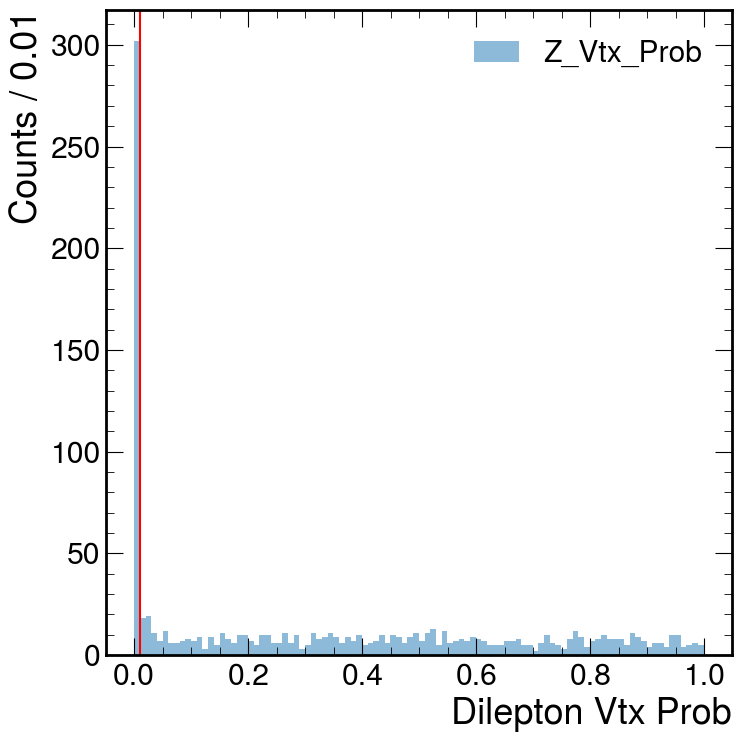

In [169]:
cut_dilepton_candi = (branches['Y_Vtx_Prob'] > 0.01)
cut_dilepton_event = ak.any(cut_dilepton_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 100, 0, 1
plt.hist(ak.flatten(branches.Y_Vtx_Prob), bins=nbins, label="Z_Vtx_Prob", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('Dilepton Vtx Prob')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/vertexing_prob.png")

branches = branches[cut_dilepton_candi][cut_dilepton_event]

print_summary(branches, "Dilepton Vtx")

Number of candidates Detector: 669
Number of events Detector: 605


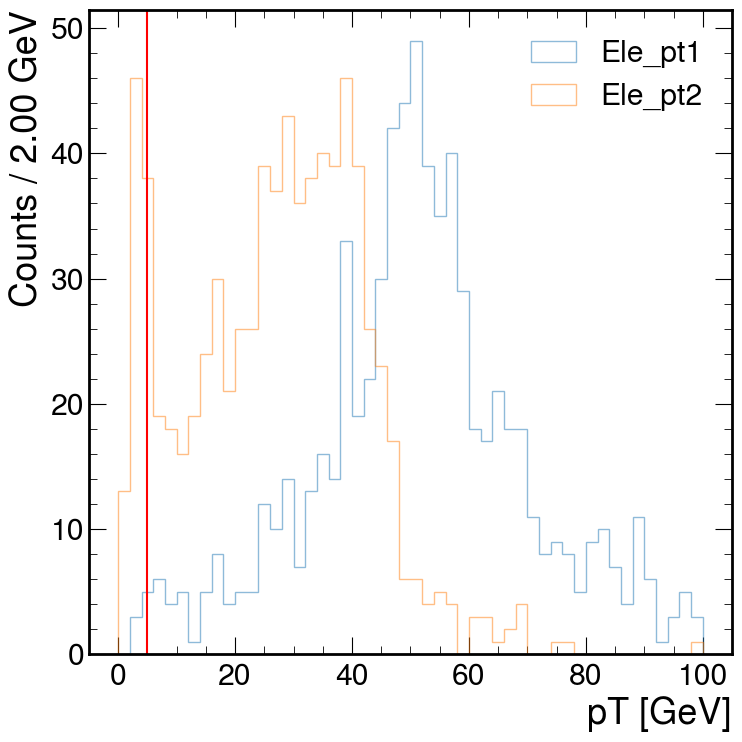

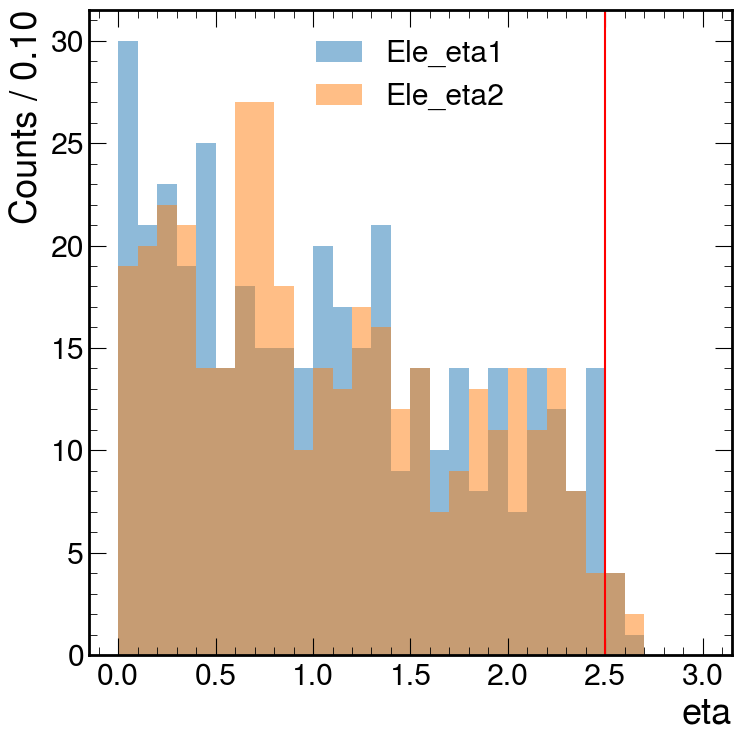

In [170]:
cut_Pt_candi =(branches['Y_pt1'] > 5.0) & (branches['Y_pt2'] > 5.0)
cut_eta_candi =(abs(branches['Y_eta1']) < 2.5) & (abs(branches['Y_eta2']) < 2.5)
cut_detector_candi = cut_Pt_candi & cut_eta_candi
cut_detector_event = ak.any(cut_detector_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 100
plt.hist(ak.flatten(branches.Y_pt1), bins=nbins, label="Ele_pt1", range=(xlow, xhigh), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Y_pt2), bins=nbins, label="Ele_pt2", range=(xlow, xhigh), alpha=0.5, histtype='step')
plt.axvline(5.0, color='r')
plt.xlabel("pT [GeV]")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/pt.png")

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 30, 0, 3
plt.hist(ak.flatten(branches.Y_eta1), bins=nbins, label="Ele_eta1", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.hist(ak.flatten(branches.Y_eta2), bins=nbins, label="Ele_eta2", range=(xlow, xhigh), alpha=0.5) #, histtype='step')
plt.axvline(2.5, color='r')
plt.xlabel("eta")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig(f"{savepath}/eta.png")

branches = branches[cut_detector_candi][cut_detector_event]

print_summary(branches, "Detector")

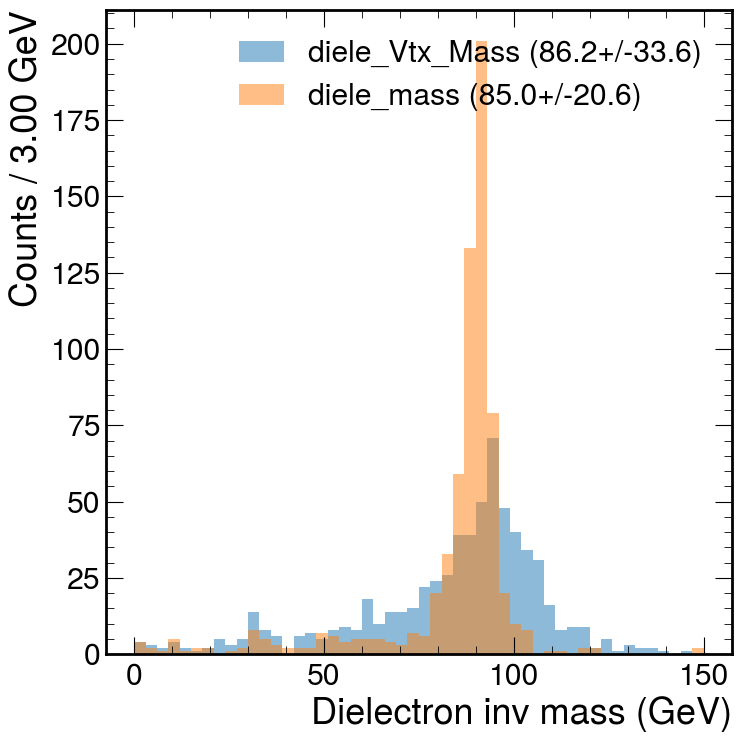

In [171]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 150

mean_Ymass = np.mean(ak.flatten(branches.Y_mass))
std_Ymass = np.std(ak.flatten(branches.Y_mass))
mean_Yvtxmass = np.mean(ak.flatten(branches.Y_Vtx_Mass))
std_Yvtxmass = np.std(ak.flatten(branches.Y_Vtx_Mass))

plt.hist(ak.flatten(branches.Y_Vtx_Mass), bins=nbins, label=f"diele_Vtx_Mass ({mean_Yvtxmass:.1f}+/-{std_Yvtxmass:.1f})", alpha=0.5, range=(xlow, xhigh))
plt.hist(ak.flatten(branches.Y_mass), bins=nbins, label=f"diele_mass ({mean_Ymass:.1f}+/-{std_Ymass:.1f})", alpha=0.5, range=(xlow, xhigh))

plt.legend()
plt.xlabel('Dielectron inv mass (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/Vtx_vs_normal_mass.png")

In [172]:
# mass_type = 'Y_Vtx_Mass'
mass_type = 'Y_mass'
eleID_cut_type = "high pT" # "low pT", "high pT", "both"

before_mass_cuts = ak.flatten(branches[mass_type])
Hpt_before_mass_cuts = ak.flatten(branches['Y_pt1'])
Lpt_before_mass_cuts = ak.flatten(branches['Y_pt2'])

In [173]:
# cut_Ymass_candi = (branches[mass_type] > 80) & (branches[mass_type] < 110)
# cut_Ymass_event = ak.any(cut_Ymass_candi, axis=1)

# plt.figure(figsize=(8, 8))
# nbins, xlow, xhigh = 25, 80, 110
# plt.hist(ak.flatten(branches[mass_type]), bins=nbins, label=f"{mass_type}", alpha=0.5, range=(xlow, xhigh))

# plt.xlabel(f'{mass_type} (GeV)')
# plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
# plt.tight_layout()
# plt.savefig(f"{savepath}/Y_mass.png")

# branches = branches[cut_Ymass_candi][cut_Ymass_event]

# print_summary(branches, f"{mass_type}")

In [174]:
before_ID_cuts = ak.flatten(branches[mass_type])
Hpt_before_ID_cuts = ak.flatten(branches['Y_pt1'])
Lpt_before_ID_cuts = ak.flatten(branches['Y_pt2'])

if eleID_cut_type == "low pT":
    cut_YmvaIso_candi = branches['Y_mvaIsoWP90_2']
elif eleID_cut_type == "high pT":
    cut_YmvaIso_candi = branches['Y_mvaIsoWP90_1']
elif eleID_cut_type == "both":
    cut_YmvaIso_candi = branches['Y_mvaIsoWP90_1'] & branches['Y_mvaIsoWP90_2']
else:
    raise ValueError("Invalid eleID_cut_type")

cut_YmvaIso_event = ak.any(cut_YmvaIso_candi, axis=1)

branches = branches[cut_YmvaIso_candi][cut_YmvaIso_event]

print_summary(branches, "YmvaIso")

Number of candidates YmvaIso: 591
Number of events YmvaIso: 549


In [175]:
before_trig_cut = ak.flatten(branches[mass_type])
Hpt_before_trig_cut = ak.flatten(branches['Y_pt1'])
Lpt_before_trig_cut = ak.flatten(branches['Y_pt2'])

In [176]:
cut_YTrigger_candi = branches['Ele_TriggerPath']
cut_YTrigger_event = ak.any(cut_YTrigger_candi, axis=1)

branches = branches[cut_YTrigger_candi][cut_YTrigger_event]

print_summary(branches, "Trigger")

Number of candidates Trigger: 527
Number of events Trigger: 491


In [177]:
after_trig_cut = ak.flatten(branches[mass_type])
Hpt_after_trig_cut = ak.flatten(branches['Y_pt1'])
Lpt_after_trig_cut = ak.flatten(branches['Y_pt2'])

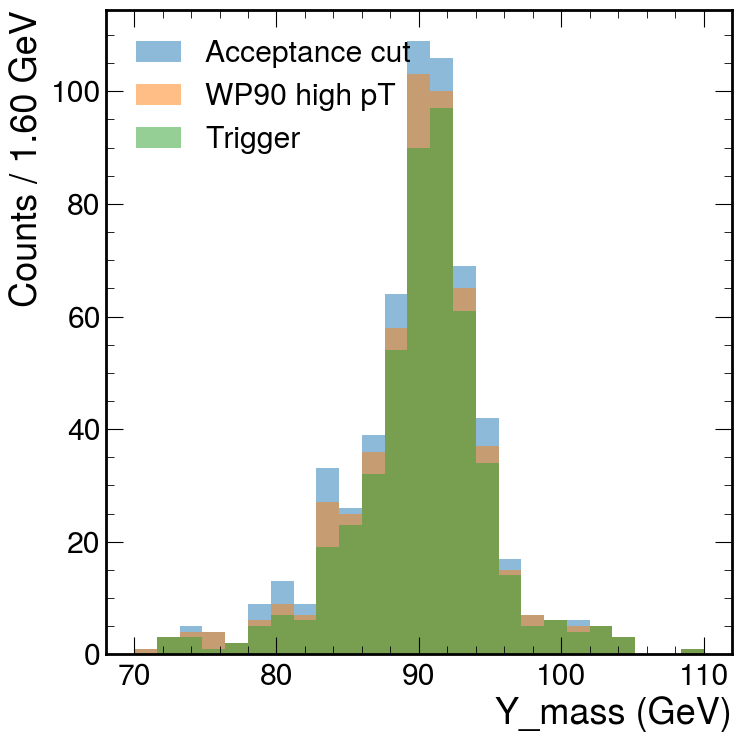

In [178]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 25, 70, 110

plt.hist(before_mass_cuts, bins=nbins, range=(xlow, xhigh), label=f"Acceptance cut", alpha=0.5)
# plt.hist(before_ID_cuts, bins=nbins, range=(xlow, xhigh), label=f"{mass_type}", alpha=0.5)
plt.hist(before_trig_cut, bins=nbins, range=(xlow, xhigh), label=f"WP90 {eleID_cut_type}", alpha=0.5)
plt.hist(after_trig_cut, bins=nbins, range=(xlow, xhigh), label=f"Trigger", alpha=0.5)
plt.legend()
plt.xlabel(f"{mass_type} (GeV)")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/Mass_dist_for_{eleID_cut_type} cuts.png")

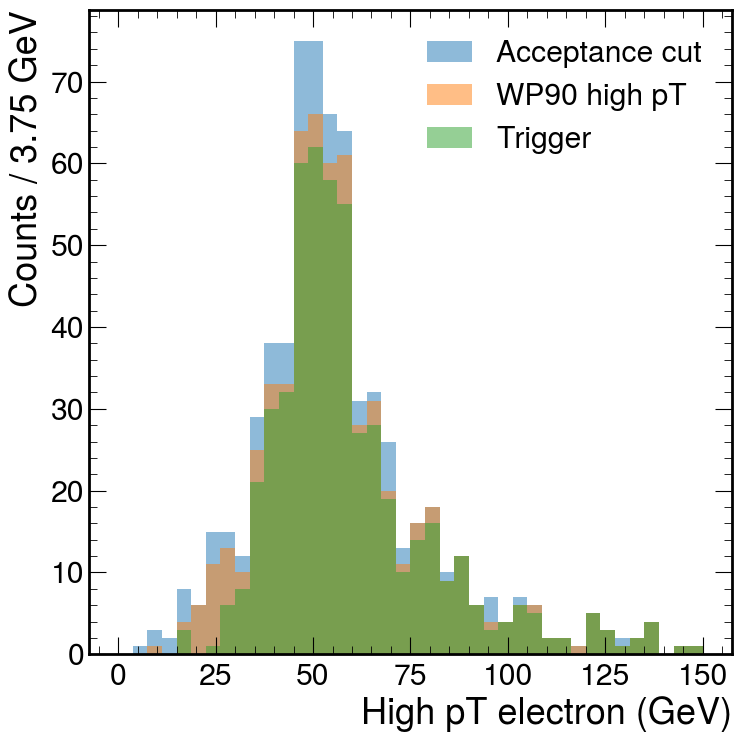

In [179]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 40, 0, 150

plt.hist(Hpt_before_mass_cuts, bins=nbins, range=(xlow, xhigh), label=f"Acceptance cut", alpha=0.5)
plt.hist(Hpt_before_trig_cut, bins=nbins, range=(xlow, xhigh), label=f"WP90 {eleID_cut_type}", alpha=0.5)
plt.hist(Hpt_after_trig_cut, bins=nbins, range=(xlow, xhigh), label=f"Trigger", alpha=0.5)
plt.legend()
plt.xlabel(f"High pT electron (GeV)")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
# plt.yscale('log')
plt.tight_layout()
plt.savefig(f"{savepath}/HighPt_dist_for_{eleID_cut_type} cuts.png")

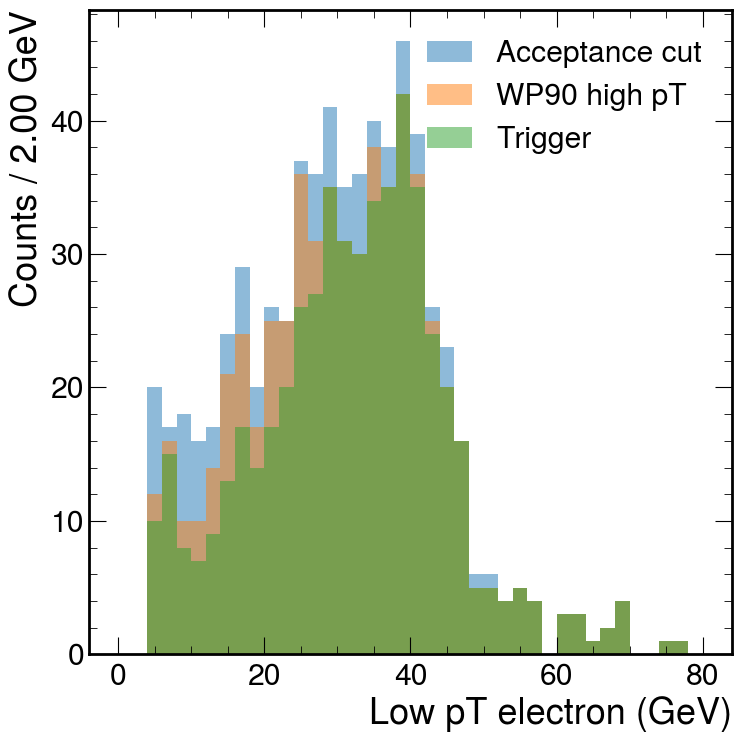

In [180]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 40, 0, 80

plt.hist(Lpt_before_mass_cuts, bins=nbins, range=(xlow, xhigh), label=f"Acceptance cut", alpha=0.5)
plt.hist(Lpt_before_trig_cut, bins=nbins, range=(xlow, xhigh), label=f"WP90 {eleID_cut_type}", alpha=0.5)
plt.hist(Lpt_after_trig_cut, bins=nbins, range=(xlow, xhigh), label=f"Trigger", alpha=0.5)
plt.legend()
plt.xlabel(f"Low pT electron (GeV)")
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
# plt.yscale('log')
plt.tight_layout()
plt.savefig(f"{savepath}/LowPt_dist_for_{eleID_cut_type} cuts.png")

## Fitting

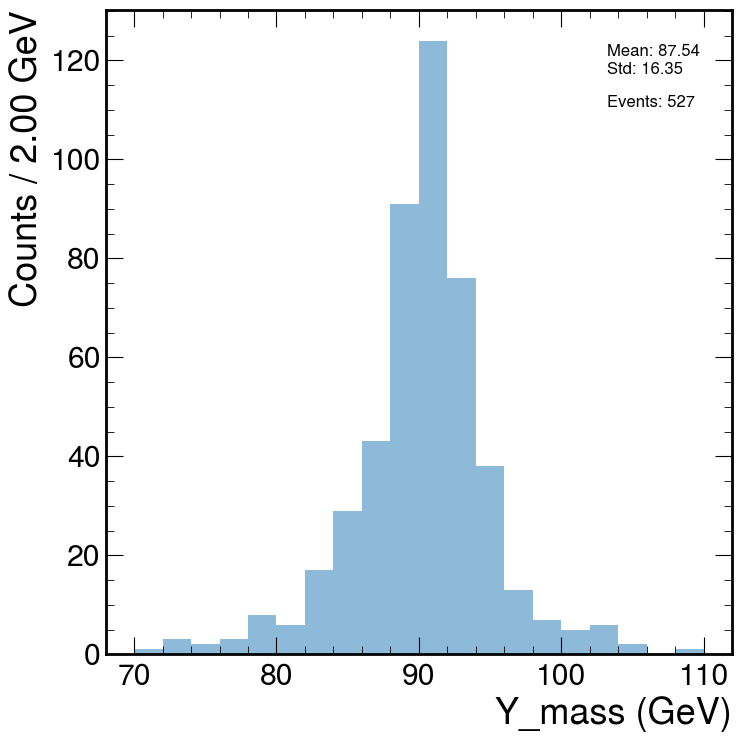

In [181]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 70, 110
plt.hist(ak.flatten(branches[mass_type]), bins=nbins, label=f"{mass_type}", alpha=0.5, range=(xlow, xhigh))

# show mean and std on plot
mean = np.mean(ak.flatten(branches[mass_type]))
std = np.std(ak.flatten(branches[mass_type]))
plt.text(0.8, 0.9, f"Mean: {mean:.2f}\nStd: {std:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.8, 0.85, f"Events: {len(ak.flatten(branches[mass_type]))}", transform=plt.gca().transAxes, fontsize=12)

plt.xlabel(f'{mass_type} (GeV)')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.tight_layout()
plt.savefig(f"{savepath}/fit_histogram_{eleID_cut_type}.png")

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 52 out-of-range events
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaussian1,gaussian2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f_sig1       5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean1        9.12000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     3 sigma1       2.00000e+00  9.50000e-01    1.00000e-01  5.00000e+01
     4 sigma2       2.00000e+00  9.50000e-01    1.00000e-01  5.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILI

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file plots/MC/cuts_ZeeTest//fit_dg_high pT.png has been created


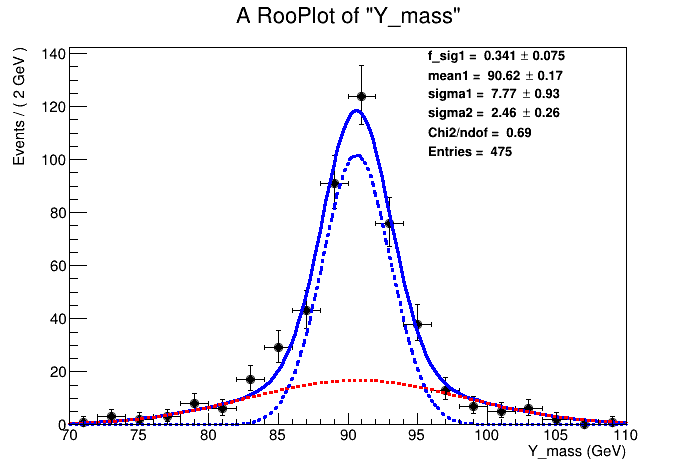

In [182]:
Z_candidate = ak.flatten(branches[mass_type]).to_numpy()
Z_mass = ROOT.RooRealVar("Z_mass", f"{mass_type}", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({f"Z_mass": Z_candidate}, [Z_mass])

frame = fit_unbinned_double_gauss(data, Z_mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs(f"{savepath}/fit_dg_{eleID_cut_type}.png")

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 52 out-of-range events
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         9.10000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file plots/MC/cuts_ZeeTest//fit_bkg_gauss_high pT.png has been created


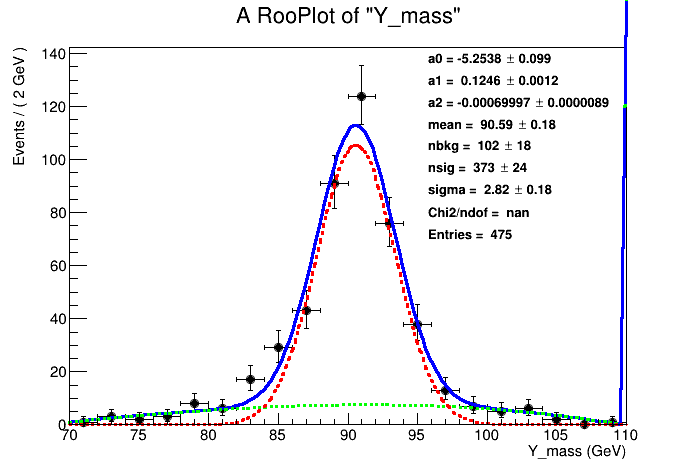

In [183]:
Z_candidate = ak.flatten(branches[mass_type]).to_numpy()
Z_mass = ROOT.RooRealVar("Z_mass", f"{mass_type}", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({f"Z_mass": Z_candidate}, [Z_mass])

frame = fit_unbinned_gauss_with_background(data, Z_mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs(f"{savepath}/fit_bkg_gauss_{eleID_cut_type}.png")